In [1]:
#install.packages("rpart")

In [2]:
library(rpart)

In [3]:
help(rpart)

In [4]:
str(kyphosis)

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


In [5]:
summary(kyphosis)

    Kyphosis       Age             Number           Start      
 absent :64   Min.   :  1.00   Min.   : 2.000   Min.   : 1.00  
 present:17   1st Qu.: 26.00   1st Qu.: 3.000   1st Qu.: 9.00  
              Median : 87.00   Median : 4.000   Median :13.00  
              Mean   : 83.65   Mean   : 4.049   Mean   :11.49  
              3rd Qu.:130.00   3rd Qu.: 5.000   3rd Qu.:16.00  
              Max.   :206.00   Max.   :10.000   Max.   :18.00  

In [6]:
head(kyphosis)

,Kyphosis,Age,Number,Start
,<fct>,<int>,<int>,<int>
1,absent,71,3,5
2,absent,158,3,14
3,present,128,4,5
4,absent,2,5,1
5,absent,1,4,15
6,absent,1,2,16


In [7]:
tree <- rpart(Kyphosis ~ .,method ='class',data=kyphosis)

In [8]:
print(tree)

n= 81 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 81 17 absent (0.79012346 0.20987654)  
   2) Start>=8.5 62  6 absent (0.90322581 0.09677419)  
     4) Start>=14.5 29  0 absent (1.00000000 0.00000000) *
     5) Start< 14.5 33  6 absent (0.81818182 0.18181818)  
      10) Age< 55 12  0 absent (1.00000000 0.00000000) *
      11) Age>=55 21  6 absent (0.71428571 0.28571429)  
        22) Age>=111 14  2 absent (0.85714286 0.14285714) *
        23) Age< 111 7  3 present (0.42857143 0.57142857) *
   3) Start< 8.5 19  8 present (0.42105263 0.57894737) *


In [9]:
summary(tree)

Call:
rpart(formula = Kyphosis ~ ., data = kyphosis, method = "class")
  n= 81 

          CP nsplit rel error    xerror      xstd
1 0.17647059      0 1.0000000 1.0000000 0.2155872
2 0.01960784      1 0.8235294 0.8235294 0.2001751
3 0.01000000      4 0.7647059 0.8235294 0.2001751

Variable importance
 Start    Age Number 
    64     24     12 

Node number 1: 81 observations,    complexity param=0.1764706
  predicted class=absent   expected loss=0.2098765  P(node) =1
    class counts:    64    17
   probabilities: 0.790 0.210 
  left son=2 (62 obs) right son=3 (19 obs)
  Primary splits:
      Start  < 8.5  to the right, improve=6.762330, (0 missing)
      Number < 5.5  to the left,  improve=2.866795, (0 missing)
      Age    < 39.5 to the left,  improve=2.250212, (0 missing)
  Surrogate splits:
      Number < 6.5  to the left,  agree=0.802, adj=0.158, (0 split)

Node number 2: 62 observations,    complexity param=0.01960784
  predicted class=absent   expected loss=0.09677419  P(node) =

In [10]:
printcp(tree)


Classification tree:
rpart(formula = Kyphosis ~ ., data = kyphosis, method = "class")

Variables actually used in tree construction:
[1] Age   Start

Root node error: 17/81 = 0.20988

n= 81 

        CP nsplit rel error  xerror    xstd
1 0.176471      0   1.00000 1.00000 0.21559
2 0.019608      1   0.82353 0.82353 0.20018
3 0.010000      4   0.76471 0.82353 0.20018


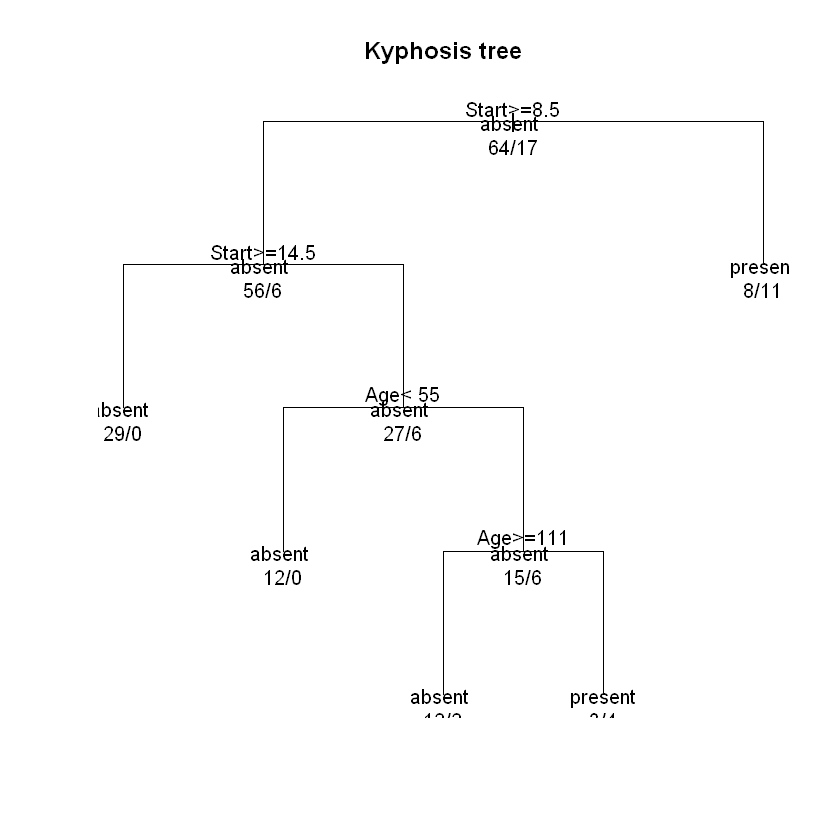

In [11]:
plot(tree,uniform = T,main="Kyphosis tree")
text(tree,use.n=T,all=T)

In [12]:
#install.packages("rpart.plot")

In [13]:
library(rpart.plot)

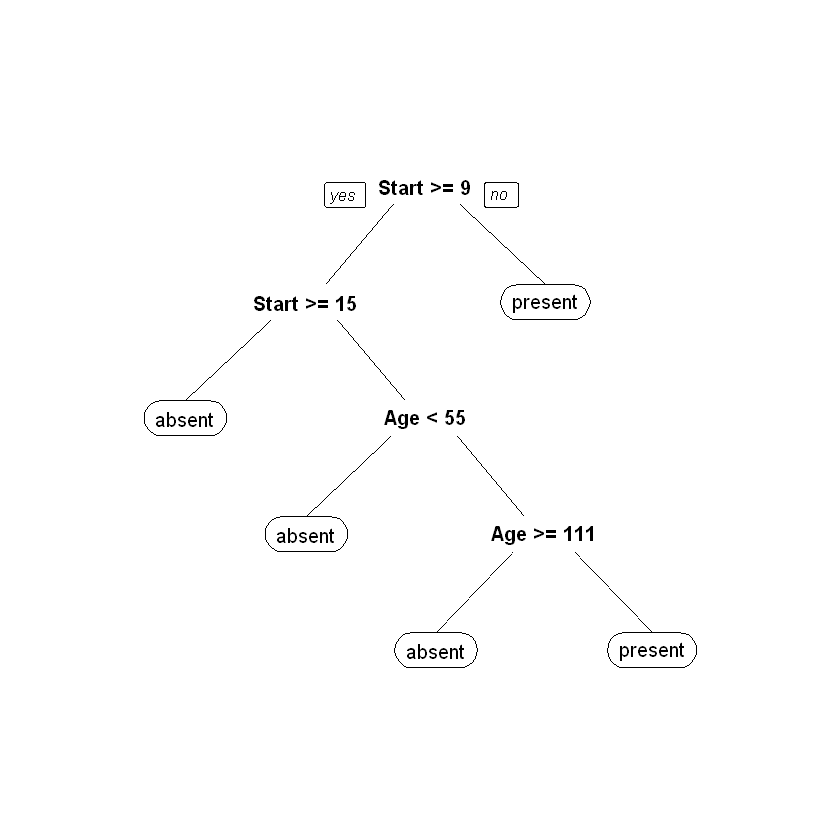

In [14]:
prp(tree)

In [15]:
#install.packages("randomForest")

In [16]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [17]:
rf_model <- randomForest(Kyphosis ~ .,data=kyphosis)

In [18]:
summary(rf_model)

                Length Class  Mode     
call               3   -none- call     
type               1   -none- character
predicted         81   factor numeric  
err.rate        1500   -none- numeric  
confusion          6   -none- numeric  
votes            162   matrix numeric  
oob.times         81   -none- numeric  
classes            2   -none- character
importance         3   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                 81   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [19]:
print(rf_model)


Call:
 randomForest(formula = Kyphosis ~ ., data = kyphosis) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 22.22%
Confusion matrix:
        absent present class.error
absent      58       6   0.0937500
present     12       5   0.7058824


In [20]:
rf_model$ntree

[1] 500

In [21]:
rf_model$confusion

,absent,present,class.error
absent,58,6,0.0937500
present,12,5,0.7058824
